## Imports

In [138]:
print('')

In [1]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [3]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [4]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

## the action!!
For all events with data, load their object . add tp_max and tc  to lists (for plotting)

In [153]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
eqs = {}
count = 0

In [7]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [8]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

3386


0
1
2
3
4
5
6
7
in except
8
9
in except
10
11
in except
12
13
14
15
16
in except
17
18
19
20
21
in except
22
23
24
in except
25
26
27
28
29
30
31
32
33
34
in except
35
36
in except
37
38
in except
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
in except
56
57
58
59
60
61
62
63
64
in except
65
66
67
68
in except
69
70
71
72
73
74
75
76
77
78
79
in except
80
81
82
83
in except
84
85
86
87
88
in except
89
90
91
in except
92
in except
93
in except
94
95
96
97
98
in except
99
in except
100
101
in except
102
103
104
105
106
107
in except
108
109
110
111
in except
112
in except
113
in except
114
115
116
117
118
119
120
121
in except
122
123
in except
124
125
126
127
in except
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
in except
143
144
in except
145
146
147
148
149
150
151
152
in except
153
in except
154
155
156
157
158
159
160
161
162
in except
163
164
165
in except
166
167
168
169
170
171
172
in except
173
174
in except
175
176
177
178
179
180
in except
181
182
183
184


In [14]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [5]:
def model_function_2(x_data, a, b):
    return a*x_data + b

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.01457777 -0.50534017]
735 735
4.4 [ 0.15572497 -1.29323208]
146 146
[ 0.15572497 -1.29323208] [0.23622614 1.13599807]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

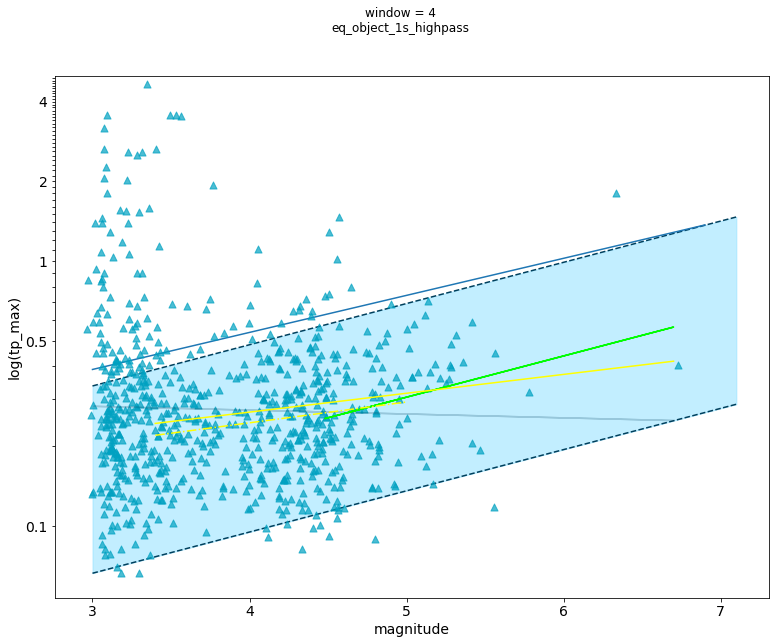

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.02295775 -0.44617206]
735 735
4.4 [ 0.16229646 -1.30741012]
146 146
[ 0.16229646 -1.30741012] [0.23622613 1.13599804]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

<Figure size 432x288 with 0 Axes>

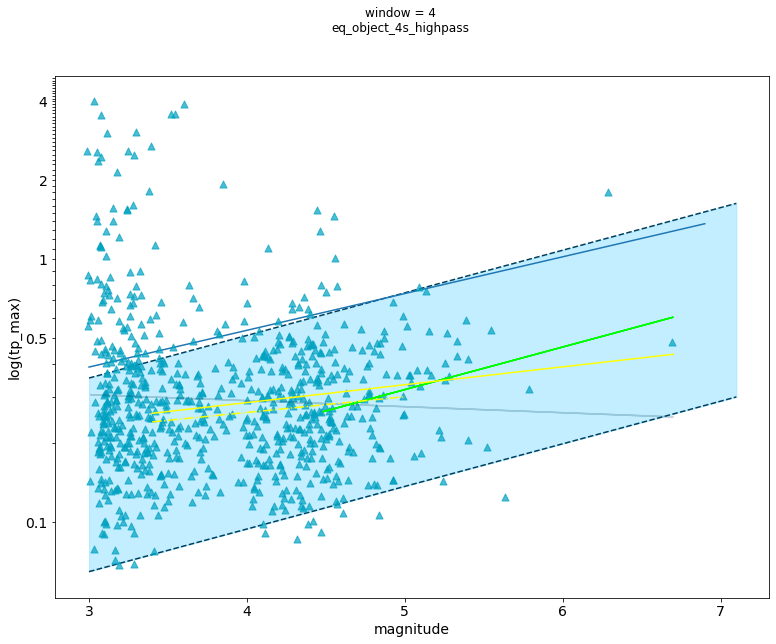

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.01872565 -0.39900403]
735 735
4.4 [ 0.17363548 -1.30025799]
146 146
[ 0.17363548 -1.30025799] [0.23622613 1.13599803]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

<Figure size 432x288 with 0 Axes>

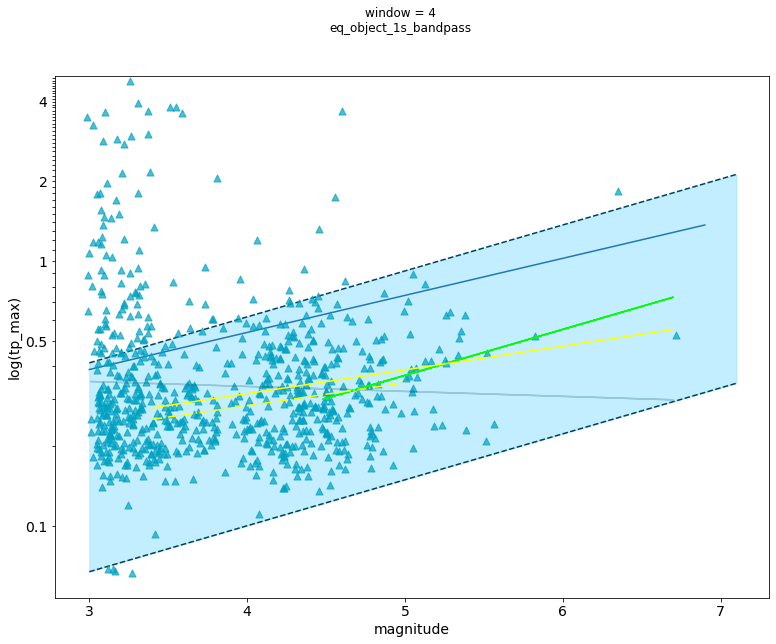

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.03283796 -0.31638051]
735 735
4.4 [ 0.17804735 -1.30697627]
146 146
[ 0.17804735 -1.30697627] [0.23622614 1.13599808]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

<Figure size 432x288 with 0 Axes>

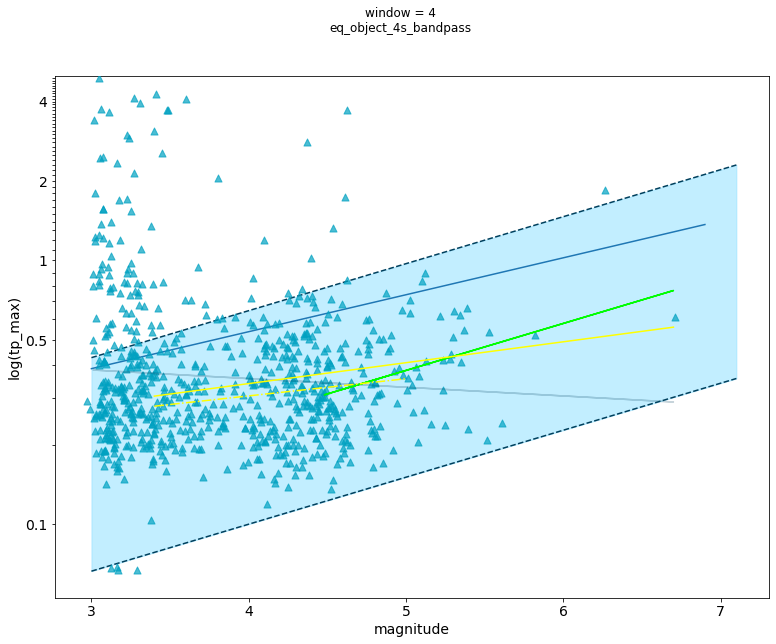

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.12522167  0.53035236]
807 807
4.4 [ 0.50341576 -2.41355778]
186 186
[ 0.50341576 -2.41355778] [0.2160591  1.03740143]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

<Figure size 432x288 with 0 Axes>

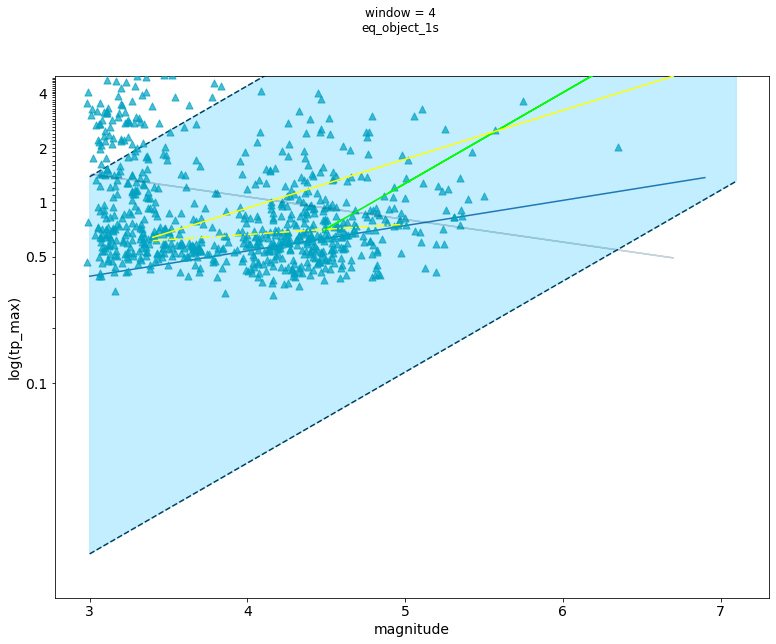

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

3 [-0.15129449  0.67848009]
807 807
4.4 [ 0.48792626 -2.31126244]
186 186
[ 0.48792626 -2.31126244] [0.2160591  1.03740143]


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: i

<Figure size 432x288 with 0 Axes>

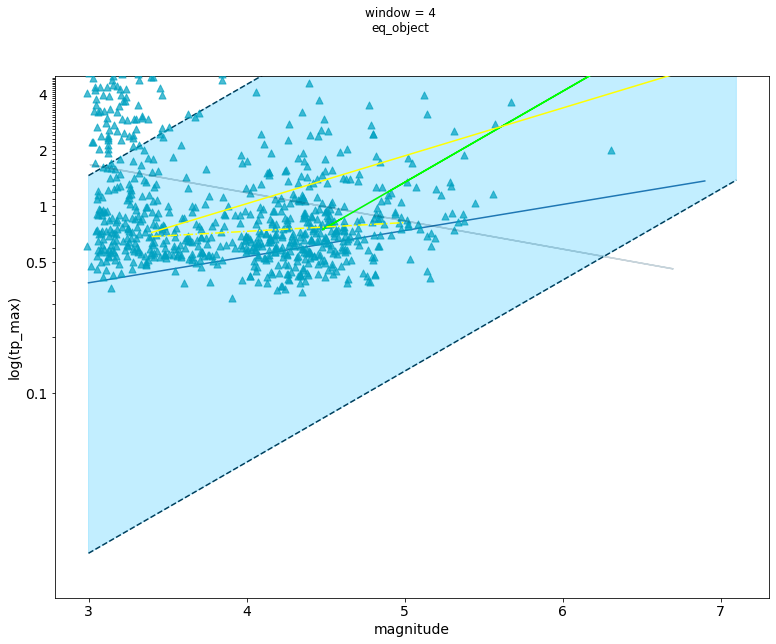

<Figure size 432x288 with 0 Axes>

In [15]:
types = ['eq_object_1s_highpass',
         'eq_object_4s_highpass',
         'eq_object_1s_bandpass',
         'eq_object_4s_bandpass',
         'eq_object_1s',
         'eq_object']
#types = ['eq_object_1s_bandpass']
for t in types:
    list_tpmax = []
    list_mags = []
    list_mag_types = []
    list_eq = []
    eqs = {}
    count = 0

    WINDOW_LENGTH = 4
    for eq_no in range(0, 1000):#len(eq_with_data)):
        #print(eq_no)
        try:
            with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/'+t+'.pkl', 'rb') as picklefile:
                eq = pickle.load(picklefile)
            #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
                #distance = eq.calculated_params['iv2'][num_station][1]
            list_tpmax.append(eq.calculated_params['tau_p_max'])
            list_mags.append(eq.event_stats['eq_mag'])
                #list_dist.append(distance)
            list_mag_types.append(eq.event_stats['eq_mag_type'])
            #if max(eq.calculated_params['tau_p_max'])>1000:
            #    eq.data.plot()
        except Exception:
            #print('in except')
            continue

    params = []
    opacities = np.linspace(0.2,1,45)
    import matplotlib.pyplot as plt
    cs = ['#00a1c1']
    #fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    y_aves_tp = []
    x_aves_tp = []
    count = 1
    eq_count = 0
    medians = [[] for _ in range(0, 45)]
    medians_of_medians = [[] for _ in range(0, 45)]
    n = 0
    if True: #for n in range(1, 10):
        fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
        for mag_lim in [3, 4.4]:#np.arange(3.0, 6.5, 0.1):

            #print(mag_lim)
            y_aves_tp = []
            x_aves_tp = []
            for i  in range(0, len(list_mags)):
                #print(i)
                #mag_lim = 3
                #print(list_mags[i])
                #print(list_tpmax[i])
                if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                    if len(list_tpmax[i])>=n:
                    #print('in if')
                        mean_tp = np.mean(list_tpmax[i]) 
                        std_tp = np.std(list_tpmax[i]) 
                        y_tp = [] 
                        for j in list_tpmax[i]: 
                            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                                y_tp.append(math.log(j, 10))
                            elif len(list_tpmax[i])==1:
                                y_tp.append(math.log(j, 10))
                        #print(y_tp)
                        x_tp = np.zeros(len(y_tp))  
                        x_tp = x_tp + list_mags[i]  
                        #print(x_tp)
                        c = 0
                        #if str(mag_lim) == str(3):# or mag_lim == 3: or 4.4?
                            #print('in if')
                        #medians_index = int(np.round(x_tp[0],1)*10)-30
                        if len(x_tp)>0 and mag_lim == 3.0: # or len(x_tc)>0:
                            if math.isnan(np.median(y_tp))==False:
                                #axs.scatter(np.array(x_tp)+np.random.uniform(-0.05, 0.05), y_tp, s = 15, alpha = 0.2, c = cs[c], marker = '.', zorder =3) 
                            #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                                axs.scatter(list_mags[i]+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)
                            medians[int(np.round(x_tp[0],1)*10)-30].append(y_tp)#axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                            #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                            #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                            #FOR CURVE FITTING
                        if math.isnan(np.median(y_tp))==False:  
                            #if np.median(y_tp):
                            y_aves_tp.append(np.median(y_tp))
                            medians_of_medians[int(np.round(x_tp[0],1)*10)-30].append(np.median(y_tp))
                            x_aves_tp.append(list_mags[i])
                        #if math.isnan(np.median(y_tc))==False:
                            #y_aves_tc.append(np.median(y_tc))
                            #x_aves_tc.append(list_mags[i])
            if len(y_aves_tp)>0:
                popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
                params.append([popt, len(x_aves_tp)])
                print(mag_lim, popt)
                axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = opacities[count], zorder =10)
                if str(mag_lim) == str(4.4):
                    popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp, absolute_sigma = True)
                    axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='lime', zorder =100, label = '4.4+')
                    popt_final, pcov_final = popt, pcov
                #print(x_aves_tp)
                #print(y_aves_tp)
                print(len(x_aves_tp), len(y_aves_tp))
                # add 2 * std banding
                count += 1
        try:
            med = []
            med_x = []
            med2 = []
            xs = np.arange(3,7.5,0.1)
            for i in range(0, len(medians_of_medians)):
                med.append(np.median(medians_of_medians[i]))
                if len(medians_of_medians[i])>0:
                    med_x.append(xs[i])
                    med2.append(np.median(medians_of_medians[i]))
            #plt.scatter(np.arange(3,7.5,0.1), med, marker = '^', color='silver', zorder = 1000)
            popt, pcov = popt_final, pcov_final
            perr = np.sqrt(np.diag(pcov))
            print(popt, perr)
            x_me = np.arange(3, 7.2, 0.1)
            x_lower_me = x_me - perr[1]*2
            x_upper_me =  x_me + perr[1]*2
            y_me = popt[0]*x_me+popt[1]
            y_lower_me = popt[0]*x_lower_me-popt[1]
            y_upper_me = popt[0]*x_upper_me-popt[1]
            #axs[0].plot(x, y_me, color = '')
            axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
            axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
            axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
            popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
            axs.plot(med_x[4:], model_function_2(np.array(med_x[4:]), *popt), color='yellow', zorder =100, label = '4:')
            popt, pcov = curve_fit(model_function_2, np.array(med_x[4:21]), np.array(med2[4:21]))
            axs.plot(med_x[4:21], model_function_2(np.array(med_x[4:21]), *popt), color='yellow', zorder =100, linestyle = '-.', label = '4:21')
                # add 2 * std banding
            #axs[0].set_ylim([0.2,2])
            #axs[0].set_yscale('log')
            #axs[1].set_yscale('log')
            #count += 1
            #x = np.arange(3, 7.2, 0.1)
            #y = 0.14*x-0.83
            #axs.plot(x, y, color = '#2a83ab', zorder =12)
            axs.set_xlabel("magnitude", fontsize = 14) 
            #axs[1].set_xlabel("magnitude") 
            axs.set_ylabel("log(tp_max)", fontsize = 14) 
            axs.tick_params(axis='both', which='major', labelsize=14)
            axs.tick_params(axis='both', which='minor', labelsize=14)
            olsen_x = np.arange(3,7,0.1)
            olsen_y = 0.14*olsen_x - 0.83
            axs.plot(olsen_x, olsen_y)
            #axs[1].set_ylabel("tc")
            #axs.set_title("tp_max") 
            #axs[1].set_title("tc") 
            fig.suptitle("window = "+str(WINDOW_LENGTH)+'\n'+t)
            #axs.fill_between(np.arange(3, 8), np.log10(0.33333), np.log10(10), color = 'grey', alpha = 0.5)
            #axs.fill_between(np.arange(3, 8), np.log10(0.33333), 3, color = 'grey', alpha = 0.2)
            #axs.set_ylim(-1, 1)
        except Exception:
            print('wrong')
    axs.set_yticks(ticks=list(np.log10([0.1, 0.5,1,2,3,4,5])), labels = [0.1, 0.5,1,2,3,4,5])
    axs.set_yticks(ticks=list(np.log10(np.arange(0.1, 5, 0.1))))
    axs.set_ylim(top = np.log10(5))
    plt.show()
    plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/tp_and_tc/comp_olson_2022-05-04/'+t+'.png')